# Trabalho prático #1 - Robótica Móvel

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sim
import math
import time

import numpy as np
import matplotlib.pyplot as plt
import sim

def get_matriz_rotacaoZ(theta):
    matriz_rotacaoZ = np.array([[np.cos(theta), -np.sin(theta), 0],
                                [np.sin(theta), np.cos(theta),  0],
                                [0            , 0            ,  1]])
    return matriz_rotacaoZ

def plotar_referencial(origem, orientacao, cor, nome):
    eixo_x = np.array(orientacao[:2, 0])
    eixo_y = np.array(orientacao[:2, 1])
    
    plt.quiver(*origem[:2], *eixo_x, color=[cor], label=nome, angles='xy', scale_units='xy', scale=1)
    plt.quiver(*origem[:2], *eixo_y, color=[cor], angles='xy', scale_units='xy', scale=1)


## Exercícios 3 e 4

Cenas para executar: incendio.ttt, incendio2.ttt, incendio3.ttt

Joao: 
 [[ 0.64596331 -0.76336846  0.          3.28215075]
 [ 0.76336846  0.64596331  0.         -3.34951186]
 [ 0.          0.          1.          0.00672653]
 [ 0.          0.          0.          1.        ]]
ANGULO EM Z:  49.76206036799075
casa: 
 [[ 9.99991407e-01  4.14554705e-03  0.00000000e+00 -1.83622789e+00]
 [-4.14554705e-03  9.99991407e-01  0.00000000e+00 -9.93771553e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00 -4.89145160e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
ANGULO EM Z:  -0.23752303003836686
poste: 
 [[ 0.99999143  0.00413908  0.          1.79170132]
 [-0.00413908  0.99999143  0.          1.6146332 ]
 [ 0.          0.          1.          1.05610538]
 [ 0.          0.          0.          1.        ]]
ANGULO EM Z:  -0.23715249227589366
arvore: 
 [[ 9.99991460e-01  4.13288303e-03  0.00000000e+00  7.25238228e+00]
 [-4.13288303e-03  9.99991460e-01  0.00000000e+00 -4.01112413e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00 

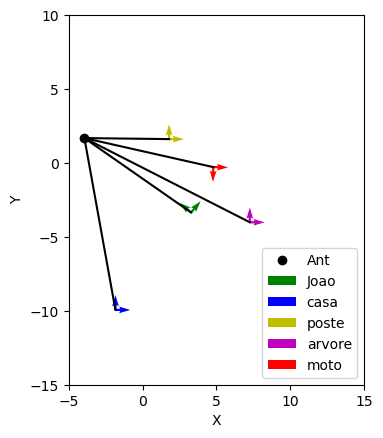

In [13]:
id_cliente = sim.simxStart("127.0.0.1", 19999, True, True, 5000, 5)

NOME_ROBO = "Ant"
OBJS = ["Joao", "casa", "poste", "arvore", "mesa"]

if id_cliente != -1:
    # Obtem informações do robô.
    rv, handle_robo = sim.simxGetObjectHandle(id_cliente, NOME_ROBO, sim.simx_opmode_oneshot_wait)
    rv, pos_robo = sim.simxGetObjectPosition(id_cliente, handle_robo, -1, sim.simx_opmode_oneshot_wait)
    
    CONSTANTE = np.array([0, 0, 0, 1]) # Última linha para transformada
    CORES = ['g', 'b', 'y', 'm', 'r']  # Cores usadas para plotagem
    trans_homogenea = [] # Contém todas as matrizes de transformação homogênea
    
    plt.figure()
    
    # Plota a posição do robô no plano xy segundo o referencial global.
    plt.plot(pos_robo[0], pos_robo[1], 'o', label=NOME_ROBO, color='k')
    
    i = 0
    for obj in OBJS:
        # Obtem informações de cada objeto da cena.
        rv, handle_obj = sim.simxGetObjectHandle(id_cliente, obj, sim.simx_opmode_oneshot_wait)
        rv, pos = sim.simxGetObjectPosition(id_cliente, handle_obj, handle_robo, sim.simx_opmode_oneshot_wait)
        rv, orientacao = sim.simxGetObjectOrientation(id_cliente, handle_obj, handle_robo, sim.simx_opmode_oneshot_wait)
        
        Rz = get_matriz_rotacaoZ(orientacao[2])
        pos = np.array(pos)
        
        plotar_referencial(pos, Rz, CORES[i], OBJS[i])
        
        # Gera a matriz de transformação homogênea
        temp = np.column_stack((Rz, pos))
        trans_homogenea_obj = np.row_stack((temp, CONSTANTE))
        
        print(obj + ": \n", trans_homogenea_obj)
        print("ANGULO EM Z: " , np.rad2deg(orientacao[2]))
        
        plt.plot([pos_robo[0], pos[0]], [pos_robo[1], pos[1]], color='k')
        
        trans_homogenea.append(trans_homogenea_obj)
        i += 1
    
    plt.axis("scaled")
    plt.axis((-5, 15, -15, 10))
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend(loc=4)
    sim.simxFinish(id_cliente)
    
else:
    print("Não foi possível conectar ao Coppelia Sim!")

## Exercício 5

Cenas para executar: incendio_laser.ttt, incendio_laser2.ttt, incendio_laser3.ttt

In [2]:
#Função que lê os dados do laser
def readSensorData(clientId=-1, 
                    range_data_signal_id="hokuyo_range_data", 
                    angle_data_signal_id="hokuyo_angle_data"):

    returnCodeRanges, string_range_data = sim.simxGetStringSignal(clientId, range_data_signal_id, sim.simx_opmode_streaming)

    returnCodeAngles, string_angle_data = sim.simxGetStringSignal(clientId, angle_data_signal_id, sim.simx_opmode_blocking)

    if returnCodeRanges == 0 and returnCodeAngles == 0:
        raw_range_data = sim.simxUnpackFloats(string_range_data)
        raw_angle_data = sim.simxUnpackFloats(string_angle_data)

        return raw_range_data, raw_angle_data

    return None

[[ 0.41606177 -0.90933635  0.          0.05426158]
 [ 0.90933635  0.41606177  0.         -5.77586269]
 [ 0.          0.          1.          0.79942405]
 [ 0.          0.          0.          1.        ]]
[[ 8.71541380e-02 -9.96194838e-01  0.00000000e+00 -5.26189804e-03]
 [ 9.96194838e-01  8.71541380e-02  0.00000000e+00  2.19583511e-04]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  1.49999619e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


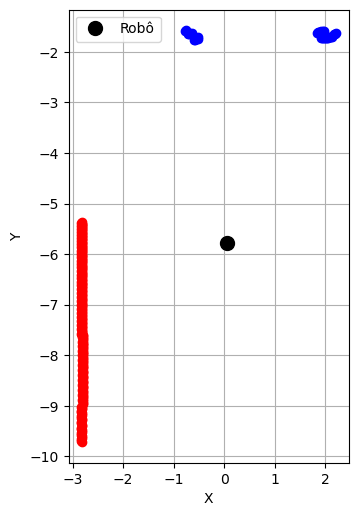

In [9]:
sim.simxFinish(-1)
id_cliente = sim.simxStart("127.0.0.1", 19999, True, True, 5000, 5)

NOME_ROBO = "Pioneer_p3dx"
OBJS = ["fastHokuyo"]

if id_cliente != -1:
    CONSTANTE = np.array([0, 0, 0, 1]) #Última linha para transformada
    max_sensor_range = 5
    
    #Handle para os dados do LASER
    laser_range_data = "hokuyo_range_data"
    laser_angle_data = "hokuyo_angle_data"
    
    #Loop para garantir que as leituras serão válidas
    rv = 1
    while rv != 0:
        rv, range_data = sim.simxGetStringSignal(id_cliente, laser_range_data, sim.simx_opmode_streaming + 10)
    
    #Leitura dos dados do laser
    raw_range_data, raw_angle_data = readSensorData(id_cliente, laser_range_data, laser_angle_data)
    laser_data = np.array([raw_angle_data, raw_range_data]).T
    
    #Informações do robô
    rv, handle_robo = sim.simxGetObjectHandle(id_cliente, NOME_ROBO, sim.simx_opmode_oneshot_wait)
    rv, pos_robo = sim.simxGetObjectPosition(id_cliente, handle_robo, -1, sim.simx_opmode_oneshot_wait)
    rv, orientacao_robo = sim.simxGetObjectOrientation(id_cliente, handle_robo, -1, sim.simx_opmode_oneshot_wait)
    #Transformada do robô para referência global
    Rz = get_matriz_rotacaoZ(orientacao_robo[2])
    pos_robo = np.array(pos_robo)
    temp = np.column_stack((Rz, pos_robo))
    T_WR = np.row_stack((temp, CONSTANTE))
    print(T_WR)
    
    #Informações do laser
    rv, handle_obj = sim.simxGetObjectHandle(id_cliente, "fastHokuyo", sim.simx_opmode_oneshot_wait)
    rv, pos = sim.simxGetObjectPosition(id_cliente, handle_obj, handle_robo, sim.simx_opmode_oneshot_wait)
    rv, orientacao = sim.simxGetObjectOrientation(id_cliente, handle_obj, handle_robo, sim.simx_opmode_oneshot_wait)
    #Transformada do laser com referencial no robô
    Rz = get_matriz_rotacaoZ(orientacao[2])
    pos = np.array(pos)  
    temp = np.column_stack((Rz, pos))
    T_RL = np.row_stack((temp, CONSTANTE))
    print(T_RL)
    
    #Plotando dados do laser em referência global
    fig = plt.figure(figsize=(6,6), dpi=100)
    ax = fig.add_subplot(111, aspect='equal')
    
    for i in range(len(laser_data)):
        ang, dist = laser_data[i]
        
        if (max_sensor_range - dist) > 0.1:
            x = dist * np.cos(ang)
            y = dist * np.sin(ang)
            z = 0
            P_L = np.array([x,y,z,1])
            P_W = T_WR @ T_RL @ P_L #Para achar posição global a partir da posição detectada pelo laser
            c = 'r'
            if ang < 0:    
                c = 'b'
            ax.plot(P_W[0], P_W[1], 'o', color=c)

    ax.plot(pos_robo[0], pos_robo[1], 'o', color='black', markersize=10, label='Robô')
        
    ax.grid()
    ax.legend()
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    
    sim.simxFinish(id_cliente)
    
else:
    print("Não foi possível conectar ao Coppelia Sim!")

## Exercício 6

Cenas para executar: incendio_laser.ttt, incendio_laser2.ttt, incendio_laser3.ttt

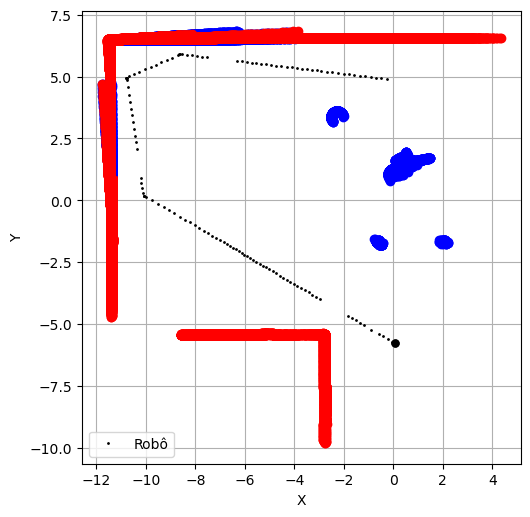

In [14]:
sim.simxFinish(-1)
id_cliente = sim.simxStart("127.0.0.1", 19999, True, True, 5000, 5)

NOME_ROBO = "Pioneer_p3dx"
OBJS = ["fastHokuyo"]

if id_cliente != -1:
    CONSTANTE = np.array([0, 0, 0, 1])
    max_sensor_range = 5
    fig = plt.figure(figsize=(6,6), dpi=100)
    ax = fig.add_subplot(111, aspect='equal')
    
    #Handles para robô, laser e juntas das rodas
    rv, handle_robo = sim.simxGetObjectHandle(id_cliente, NOME_ROBO, sim.simx_opmode_oneshot_wait)
    rv, handle_obj = sim.simxGetObjectHandle(id_cliente, "fastHokuyo", sim.simx_opmode_oneshot_wait)
    rv, l_wheel = sim.simxGetObjectHandle(id_cliente, NOME_ROBO + '_leftMotor', sim.simx_opmode_oneshot_wait)
    rv, r_wheel = sim.simxGetObjectHandle(id_cliente, NOME_ROBO + '_rightMotor', sim.simx_opmode_oneshot_wait)
    
    #Handle para os dados do LASER
    laser_range_data = "hokuyo_range_data"
    laser_angle_data = "hokuyo_angle_data"
    
    #Dados do robô
    L = 0.381
    r = 0.0975
    
    #Loop para garantir que as leituras serão válidas
    rv = 1
    while rv != 0:
        rv, range_data = sim.simxGetStringSignal(id_cliente, laser_range_data, sim.simx_opmode_streaming + 10)
    
    
    #Vê se legenda já foi plotada
    legenda = False
    
    #Lembrar de habilitar o 'Real-time mode'
    t = 0
    startTime=time.time()
    lastTime = startTime
    
    #Durante 60 segundos, move o robô e plota o que foi detectado pelo laser em referência global
    while t < 60:
        now = time.time()
        dt = now - lastTime
        
        #Transformada do robô para referência global
        rv, pos_robo = sim.simxGetObjectPosition(id_cliente, handle_robo, -1, sim.simx_opmode_oneshot_wait)
        rv, orientacao_robo = sim.simxGetObjectOrientation(id_cliente, handle_robo, -1, sim.simx_opmode_oneshot_wait)
        Rz = get_matriz_rotacaoZ(orientacao_robo[2])
        pos_robo = np.array(pos_robo)
        temp = np.column_stack((Rz, pos_robo))
        T_WR = np.row_stack((temp, CONSTANTE))

        #Transformada do laser com referencial no robô
        rv, pos = sim.simxGetObjectPosition(id_cliente, handle_obj, handle_robo, sim.simx_opmode_oneshot_wait)
        rv, orientacao = sim.simxGetObjectOrientation(id_cliente, handle_obj, handle_robo, sim.simx_opmode_oneshot_wait)
        Rz = get_matriz_rotacaoZ(orientacao[2])
        pos = np.array(pos)  
        temp = np.column_stack((Rz, pos))
        T_RL = np.row_stack((temp, CONSTANTE))
        
        if t == 0:
            ax.plot(pos_robo[0], pos_robo[1], 'o', color='black', markersize=5)
        
        #Leitura dos dados do laser
        raw_range_data, raw_angle_data = readSensorData(id_cliente, laser_range_data, laser_angle_data)
        laser_data = np.array([raw_angle_data, raw_range_data]).T
        
        for i in range(len(laser_data)):
            ang, dist = laser_data[i]
        
            if (max_sensor_range - dist) > 0.1:
                x = dist * np.cos(ang)
                y = dist * np.sin(ang)
                z = 0
                P_L = np.array([x,y,z,1])
                P_W = T_WR @ T_RL @ P_L #Para achar posição global a partir da posição detectada pelo laser
                c = 'r'
                if ang < 0:    
                    c = 'b'
                ax.plot(P_W[0], P_W[1], 'o', color=c) #Plot do que foi detectado em posição global

        #Plota um ponto preto para representar a posição do robô
        ax.plot(pos_robo[0], pos_robo[1], 'o', color='black', markersize=1)
        if legenda == False:
            ax.plot(pos_robo[0], pos_robo[1], 'o', color='black', markersize=1, label='Robô')
            legenda = True
        
        #Velocidades linear e angular
        v = 0
        w = np.deg2rad(0)      

        frente = int(len(laser_data)/2)
        lado_direito = int(len(laser_data)*1/4)
        lado_esquerdo = int(len(laser_data)*3/4)
        
        if laser_data[frente, 1] > 2:
            v = .5
            w = 0
        elif laser_data[lado_direito, 1] > 2:
            v = 0
            w = np.deg2rad(-30)
        elif laser_data[lado_esquerdo, 1] > 2:
            v = 0
            w = np.deg2rad(30)
        
        #Modelo cinemático
        wl = v/r - (w*L)/(2*r)
        wr = v/r + (w*L)/(2*r)
        
        #Muda velocidade das rodas para as definidas
        sim.simxSetJointTargetVelocity(id_cliente, l_wheel, wl, sim.simx_opmode_streaming + 5)
        sim.simxSetJointTargetVelocity(id_cliente, r_wheel, wr, sim.simx_opmode_streaming + 5)        
    
        t = t + dt  
        lastTime = now
        
    ax.grid()
    ax.legend()
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    
    #Parando o robô e a simulação
    sim.simxSetJointTargetVelocity(id_cliente, r_wheel, 0, sim.simx_opmode_oneshot_wait)
    sim.simxSetJointTargetVelocity(id_cliente, l_wheel, 0, sim.simx_opmode_oneshot_wait)        
    sim.simxStopSimulation(id_cliente,sim.simx_opmode_blocking)
    sim.simxFinish(id_cliente)
    
else:
    print("Não foi possível conectar ao Coppelia Sim!")